# Thank you for visiting my Notebook.
# I'm look forward to your high evaluation.
# If you have any suggestions for improvement, please feel free to comment.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

pd.set_option("display.max_columns",None)

# Loading Data

In [2]:
df1 = pd.read_csv("/kaggle/input/nba-2023-player-shot-dataset/1_lebron_james_shot_chart_1_2023.csv")
print(df1.shape)
df1.head(3)

(1533, 15)


,top,left,date,qtr,time_remaining,result,shot_type,distance_ft,lead,lebron_team_score,opponent_team_score,opponent,team,season,color
0,310,203,"Oct 18, 2022",1st Qtr,09:26,False,3,26,False,2,2,GSW,LAL,2023,red
1,213,259,"Oct 18, 2022",1st Qtr,08:38,False,2,16,False,4,5,GSW,LAL,2023,red
2,143,171,"Oct 18, 2022",1st Qtr,08:10,False,2,11,False,4,7,GSW,LAL,2023,red


In [3]:
df2 = pd.read_csv("/kaggle/input/nba-2023-player-shot-dataset/2_james_harden_shot_chart_2023.csv")
print(df2.shape)
df2.head(3)

(1025, 15)


,top,left,date,qtr,time_remaining,result,shot_type,distance_ft,lead,lebron_team_score,opponent_team_score,opponent,team,season,color
0,323,329,"Oct 18, 2022",1st Qtr,8:52,False,3,28,False,2,9,BOS,PHI,2023,red
1,340,265,"Oct 18, 2022",1st Qtr,4:08,True,3,29,True,18,17,BOS,PHI,2023,green
2,304,318,"Oct 18, 2022",1st Qtr,2:51,True,3,26,True,22,17,BOS,PHI,2023,green


In [4]:
df3 = pd.read_csv("/kaggle/input/nba-2023-player-shot-dataset/3_stephen_curry_shot_chart_2023.csv")
print(df3.shape)
df3.head(3)

(1434, 15)


,top,left,date,qtr,time_remaining,result,shot_type,distance_ft,lead,lebron_team_score,opponent_team_score,opponent,team,season,color
0,63,300,"Oct 18, 2022",1st Qtr,7:27,False,2,6,True,9,6,LAL,GSW,2023,red
1,133,389,"Oct 18, 2022",1st Qtr,7:22,True,2,17,True,11,6,LAL,GSW,2023,green
2,326,247,"Oct 18, 2022",1st Qtr,7:11,False,3,27,True,11,6,LAL,GSW,2023,red


# Data Observation

In [5]:
display(df1.describe())
display(df2.describe())
display(df3.describe())

,top,left,shot_type,distance_ft,lebron_team_score,opponent_team_score,season
count,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.0
mean,151.410959,231.982387,2.318982,12.960861,59.813438,59.098500,2023.0
std,98.316684,91.626122,0.466234,10.698687,35.376109,35.456701,0.0
min,36.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2023.0
25%,67.000000,193.000000,2.000000,3.000000,31.000000,31.000000,2023.0
50%,98.000000,238.000000,2.000000,10.000000,60.000000,59.000000,2023.0
75%,251.000000,261.000000,3.000000,25.000000,88.000000,88.000000,2023.0
max,389.000000,478.000000,3.000000,34.000000,140.000000,133.000000,2023.0


,top,left,shot_type,distance_ft,lebron_team_score,opponent_team_score,season
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.0
mean,187.128780,263.727805,2.486829,16.507317,56.415610,55.072195,2023.0
std,100.476856,96.539798,0.500070,10.589748,33.629167,33.086987,0.0
min,31.000000,-3.000000,2.000000,0.000000,0.000000,0.000000,2023.0
25%,83.000000,216.000000,2.000000,5.000000,29.000000,28.000000,2023.0
50%,180.000000,243.000000,2.000000,19.000000,55.000000,54.000000,2023.0
75%,292.000000,328.000000,3.000000,26.000000,83.000000,83.000000,2023.0
max,368.000000,481.000000,3.000000,32.000000,135.000000,131.000000,2023.0


,top,left,shot_type,distance_ft,lebron_team_score,opponent_team_score,season
count,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.0
mean,191.847280,246.480474,2.548117,18.411437,63.510460,62.246165,2023.0
std,101.700886,120.059755,0.497853,10.367741,34.686879,34.981942,0.0
min,26.000000,-3.000000,2.000000,0.000000,0.000000,0.000000,2023.0
25%,80.000000,172.000000,2.000000,6.000000,34.000000,34.250000,2023.0
50%,208.000000,249.000000,3.000000,24.000000,65.500000,63.000000,2023.0
75%,287.000000,328.000000,3.000000,27.000000,93.000000,91.000000,2023.0
max,388.000000,483.000000,3.000000,36.000000,128.000000,135.000000,2023.0


In [6]:
display(df1.isnull().sum().sum())
display(df2.isnull().sum().sum())
display(df3.isnull().sum().sum())

0

0

0

In [7]:
dfs = {}
dfs[f"df1"] = pd.DataFrame(df1)
dfs[f"df2"] = pd.DataFrame(df2)
dfs[f"df3"] = pd.DataFrame(df3)

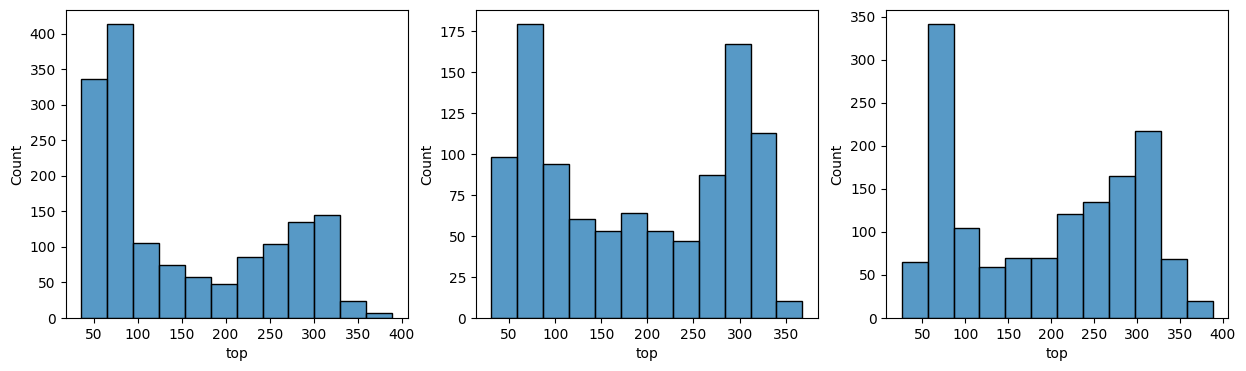

In [8]:
plt.figure(figsize=(15,4))
for i in range(1,4):
    n = int(i)+130
    plt.subplot(n)
    sns.histplot(dfs[f"df{i}"]["top"])

## James Harden has more shots from both sides than the other two

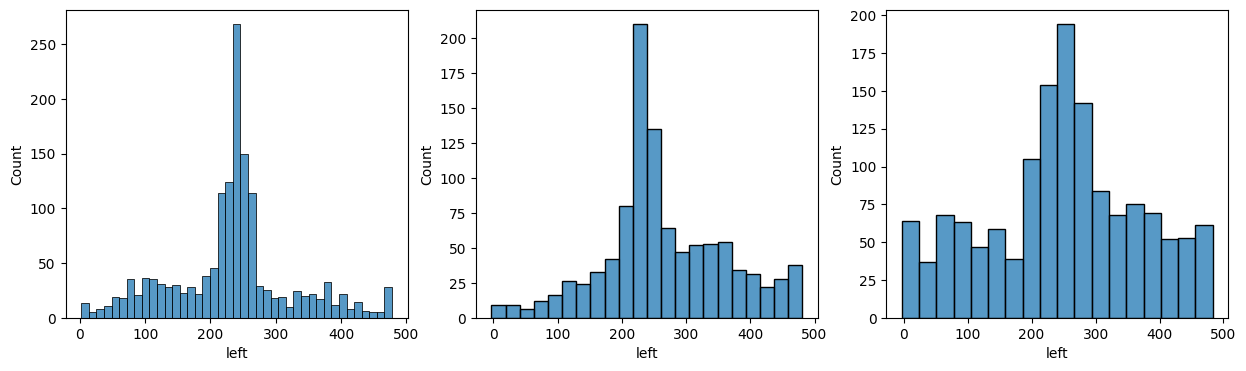

In [9]:
plt.figure(figsize=(15,4))
for i in range(1,4):
    n = int(i)+130
    plt.subplot(n)
    sns.histplot(dfs[f"df{i}"]["left"])

## Stephen Curry takes a high percentage of his shots from outside the middle

### It is difficult for me to know which distance is the horizontal and vertical position in basketball

In [10]:
for i in range(1,4):
    display(dfs[f"df{i}"]["qtr"].value_counts())
    print()

qtr
2nd Qtr    406
4th Qtr    400
3rd Qtr    374
1st Qtr    321
1st OT      28
2nd OT       4
Name: count, dtype: int64

qtr
2nd Qtr    314
1st Qtr    247
4th Qtr    245
3rd Qtr    203
1st OT      13
2nd OT       3
Name: count, dtype: int64

qtr
3rd Qtr    385
4th Qtr    380
1st Qtr    330
2nd Qtr    329
1st OT      10
Name: count, dtype: int64

## James Harden is capable of high performance from the start, while Stephen Curry seems to be a slow starter.
## LeBron James also seems to have a low score for only 1 qtr.

In [11]:
def convert_time(time_str):
    minutes, seconds = map(int, time_str.split(":"))
    return minutes * 60 + seconds

In [12]:
df1['seconds'] = df1['time_remaining'].apply(convert_time)
df2['seconds'] = df2['time_remaining'].apply(convert_time)
df3['seconds'] = df3['time_remaining'].apply(convert_time)

dfs = {}
dfs[f"df1"] = pd.DataFrame(df1)
dfs[f"df2"] = pd.DataFrame(df2)
dfs[f"df3"] = pd.DataFrame(df3)

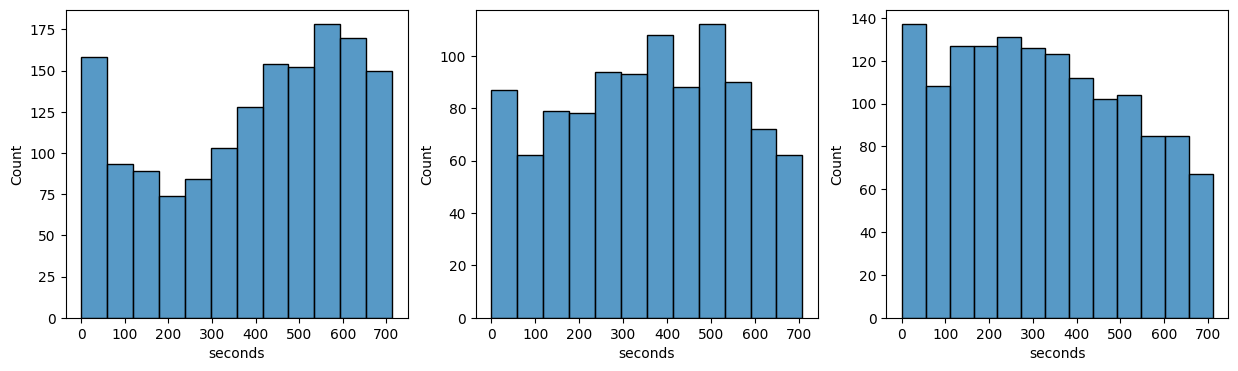

In [13]:
plt.figure(figsize=(15,4))
for i in range(1,4):
    n = int(i)+130
    plt.subplot(n)
    sns.histplot(dfs[f"df{i}"]["seconds"])

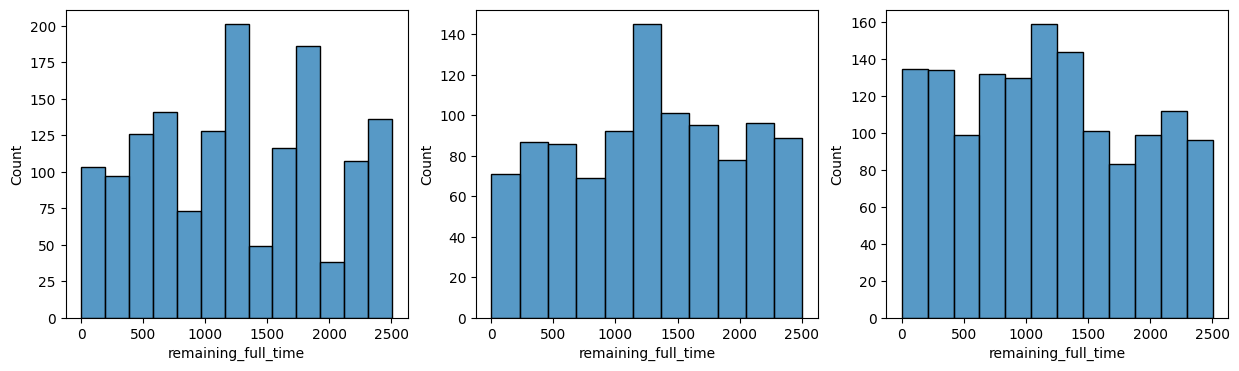

In [41]:
plt.figure(figsize=(15,4))
for i in range(1,4):
    df = dfs[f"df{i}"]
    try:
        df["qtr"] = df[df['qtr'].str.contains(r'\bQtr\b', regex=True)]["qtr"].str[0].astype("int8")
    except:
        pass
    df['remaining_full_time'] = (4-df["qtr"])*600 + df['seconds']
    dfs[f"df{i}"] = df
    n = int(i)+130
    plt.subplot(n)
    sns.histplot(df["remaining_full_time"])

## Stephen Curry still seems to be a slow starter.

## LeBron James is often shooting when there is a lot of time left, but also often around 0.
## LeBron James takes a lot of shots right after a few shots.
## Is he building up strength?

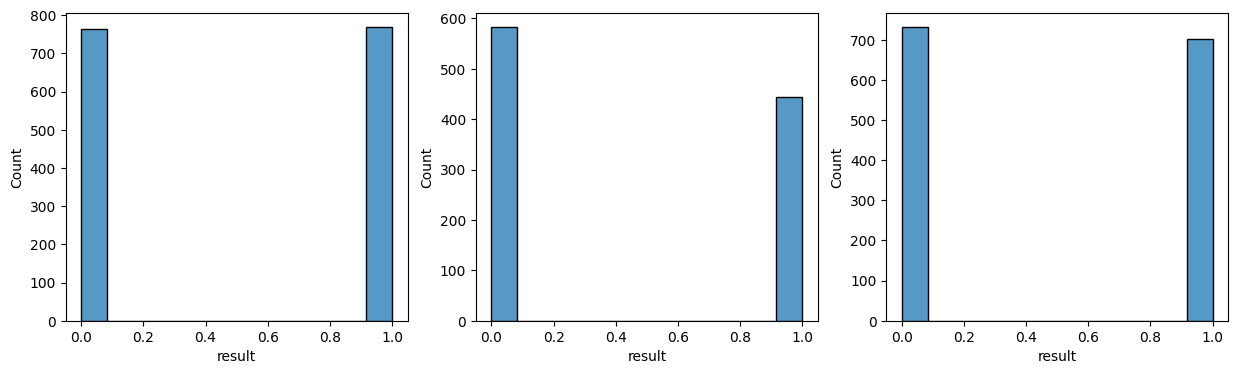

In [15]:
plt.figure(figsize=(15,4))
for i in range(1,4):
    n = int(i)+130
    plt.subplot(n)
    sns.histplot(dfs[f"df{i}"]["result"].astype("int8"))

In [16]:
for i in range(1,4):
    df = dfs[f"df{i}"]
    display(df.groupby("qtr").agg({"result":"mean"}))

,result
qtr,
1.0,0.485981
2.0,0.532020
3.0,0.529412
4.0,0.465000


,result
qtr,
1.0,0.465587
2.0,0.404459
3.0,0.458128
4.0,0.424490


,result
qtr,
1.0,0.527273
2.0,0.489362
3.0,0.464935
4.0,0.486842


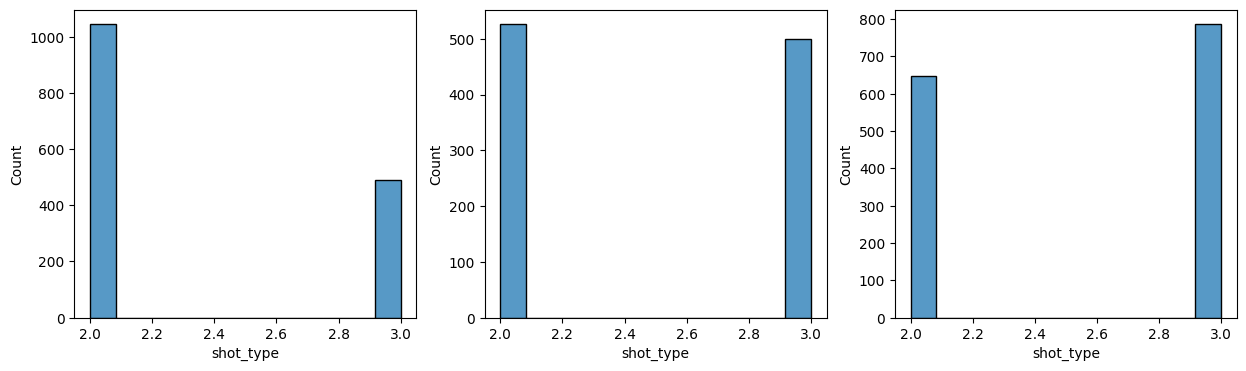

In [17]:
plt.figure(figsize=(15,4))
for i in range(1,4):
    n = int(i)+130
    plt.subplot(n)
    sns.histplot(dfs[f"df{i}"]["shot_type"])

## Does this not depend on the person, but on the position?
(https://thedigestweb.com/basketball/detail/id=59778)

In [18]:
for i in range(1,4):
    df = dfs[f"df{i}"]
    mean_2 = df[df["shot_type"]==2]["result"].mean()
    mean_3 = df[df["shot_type"]==3]["result"].mean()
    print(f"2pts:{mean_2},3pts:{mean_3}")

2pts:0.5900383141762452,3pts:0.310838445807771
2pts:0.47718631178707227,3pts:0.3847695390781563
2pts:0.5771604938271605,3pts:0.41857506361323155


## Stephen Curry's 3-point shooting success rate is very high!

## James Harden doesn't seem to have very good 2pt accuracy.

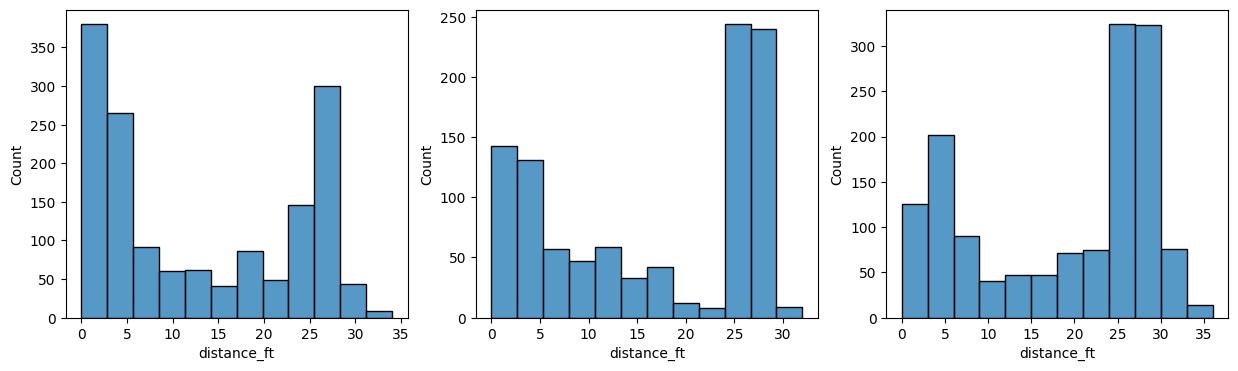

In [37]:
plt.figure(figsize=(15,4))
for i in range(1,4):
    n = int(i)+130
    plt.subplot(n)
    df = dfs[f"df{i}"]
    sns.histplot(df["distance_ft"])

## James Harden often shoots just short of 3pts.
## If he gets 2pts at 20ft, is he intentionally aiming for 3pts at 25ft?

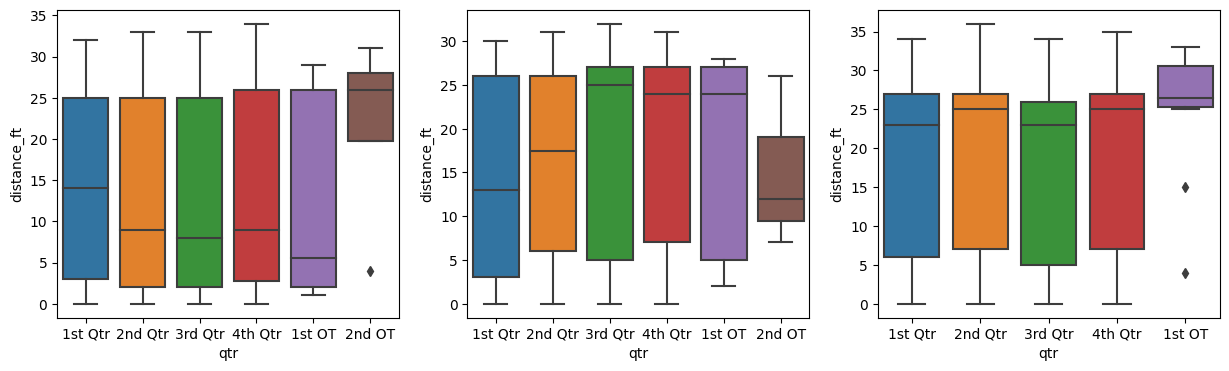

In [39]:
plt.figure(figsize=(15,4))
for i in range(1,4):
    n = int(i)+130
    plt.subplot(n)
    df = dfs[f"df{i}"]
    sns.boxplot(x=df["qtr"],y=df["distance_ft"])

## James Harden is increasing distance as time decreases

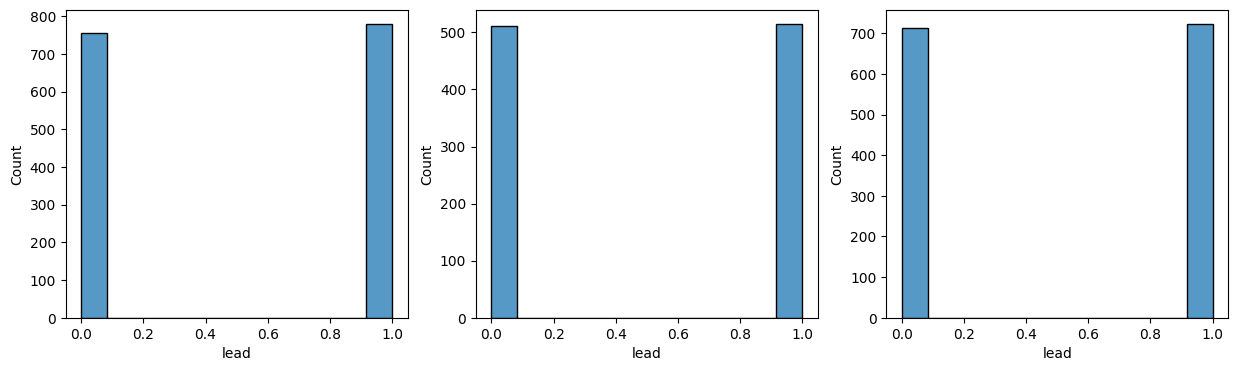

In [36]:
plt.figure(figsize=(15,4))
for i in range(1,4):
    n = int(i)+130
    plt.subplot(n)
    df = dfs[f"df{i}"]
    sns.histplot(df["lead"])

In [47]:
for i in range(1,4):
    df = dfs[f"df{i}"]
    print(df.groupby("lead").agg({"result":"mean"}))
    print()

         result
lead           
False  0.454305
True   0.546272

         result
lead           
False  0.373777
True   0.490272

         result
lead           
False  0.432584
True   0.547091



In [48]:
for i in range(1,4):
    df = dfs[f"df{i}"]
    print(df.groupby("lead").agg({"shot_type":"mean"}))
    print()

       shot_type
lead            
False   2.316556
True    2.321337

       shot_type
lead            
False   2.461840
True    2.511673

       shot_type
lead            
False   2.558989
True    2.537396



## If you are leading, shot_type will not change, but the success rate will increase. Does the success rate change with the mental state of even the best players?

In [49]:
for i in range(1,4):
    df = dfs[f"df{i}"]
    df["point_diff"] = df["lebron_team_score"] - df["opponent_team_score"]
    dfs[f"df{i}"] = df

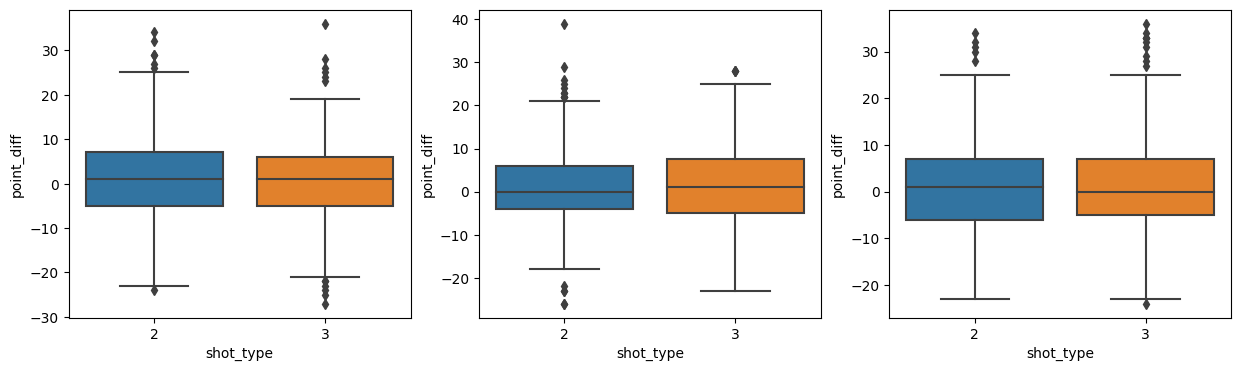

In [50]:
plt.figure(figsize=(15,4))
for i in range(1,4):
    n = int(i)+130
    plt.subplot(n)
    df = dfs[f"df{i}"]
    sns.boxplot(x=df["shot_type"],y=df["point_diff"])

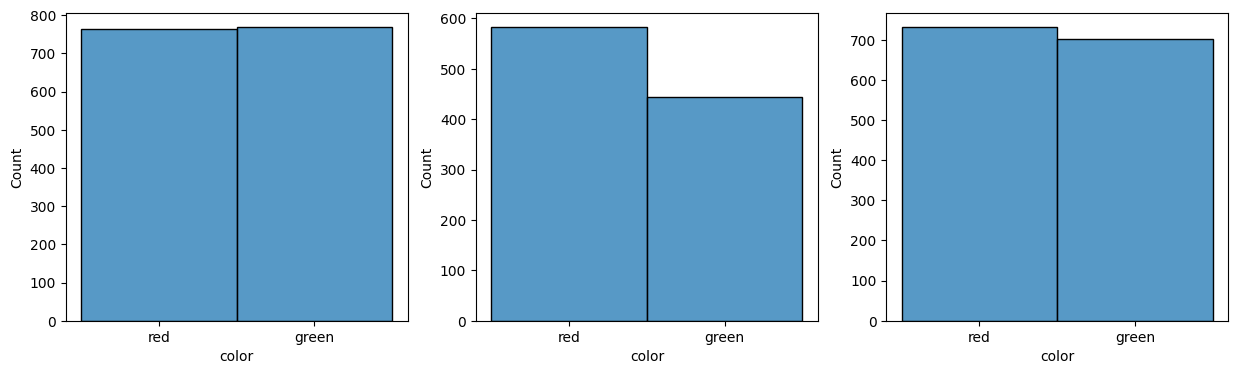

In [51]:
plt.figure(figsize=(15,4))
for i in range(1,4):
    n = int(i)+130
    plt.subplot(n)
    df = dfs[f"df{i}"]
    sns.histplot(df["color"])